In [ ]:
import numpy
data_inputs = numpy.array([[1, 1],
                           [1, 0],
                           [0, 1],
                           [0, 0]])
data_outputs = numpy.array([0, 
                            1, 
                            1, 
                            0])

In [ ]:
pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.6 MB/s 


In [ ]:
import pygad.gann
GANN_instance = pygad.gann.GANN(num_solutions=10,
                                num_neurons_input=2,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="softmax")

In [ ]:
print(GANN_instance.population_networks)

[<pygad.nn.nn.DenseLayer object at 0x7f6e499cc910>, <pygad.nn.nn.DenseLayer object at 0x7f6e499c5210>, <pygad.nn.nn.DenseLayer object at 0x7f6e499c5cd0>, <pygad.nn.nn.DenseLayer object at 0x7f6e499c5f10>, <pygad.nn.nn.DenseLayer object at 0x7f6e499d3050>, <pygad.nn.nn.DenseLayer object at 0x7f6e499e0150>, <pygad.nn.nn.DenseLayer object at 0x7f6e499e0410>, <pygad.nn.nn.DenseLayer object at 0x7f6e499e04d0>, <pygad.nn.nn.DenseLayer object at 0x7f6e499e0590>, <pygad.nn.nn.DenseLayer object at 0x7f6e499e0610>]


In [ ]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)
print(population_vectors)

[array([ 0.01232519, -0.08328414,  0.0899503 ,  0.00821192,  0.01245127,
        0.09764267,  0.0176425 , -0.01658563]), array([-0.04916328, -0.02107455,  0.04681263, -0.04301151, -0.01977242,
        0.00920628, -0.06692007, -0.06694847]), array([ 0.07668438,  0.06990861, -0.03183949, -0.06945869,  0.05456241,
       -0.07497985,  0.02847494,  0.03998888]), array([ 0.0550539 , -0.01946402, -0.00206063, -0.00633415,  0.02987866,
        0.06546817, -0.01295753,  0.09210858]), array([ 0.06752654, -0.05721396,  0.07376065,  0.01251284,  0.00045096,
        0.09143575, -0.0572566 ,  0.06040275]), array([ 0.04754639, -0.00098168, -0.06079357, -0.06897168,  0.03694957,
        0.07043984, -0.0282093 , -0.0097922 ]), array([-0.074687  ,  0.06388518,  0.0711392 ,  0.08756659,  0.02814146,
        0.00969404,  0.01088621, -0.02146027]), array([ 0.06871965,  0.00442287,  0.01102794,  0.08089348, -0.03238554,
        0.0140686 , -0.01476177, -0.03781947]), array([ 0.05890816,  0.09175516,  0.065

In [ ]:
population_vectors = population_vectors

In [ ]:
num_generations = 50

In [ ]:
num_parents_mating = 3

In [ ]:
initial_population = population_vectors.copy()

In [ ]:
def fitness_function(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs
    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs,
                                   problem_type="classification")
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100
    return solution_fitness

In [ ]:
fitness_func = fitness_function

In [ ]:
mutation_percent_genes = 5

In [ ]:
import pygad.nn

In [ ]:
def callback_generation(ga_instance):
    global GANN_instance
    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, population_vectors=ga_instance.population)
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Accuracy   = {fitness}".format(fitness=ga_instance.best_solution()[1]))

In [ ]:
callback_generation = callback_generation

In [ ]:
ga_instance = pygad.GA(num_generations=50, 
                       num_parents_mating=3, 
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:503: UserWarning: The percentage of genes to mutate (mutation_percent_genes=5) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:764: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from 

In [ ]:
ga_instance.run()

Generation = 1
Accuracy   = 75.0
Generation = 2
Accuracy   = 75.0
Generation = 3
Accuracy   = 75.0
Generation = 4
Accuracy   = 75.0
Generation = 5
Accuracy   = 100.0
Generation = 6
Accuracy   = 100.0
Generation = 7
Accuracy   = 100.0
Generation = 8
Accuracy   = 100.0
Generation = 9
Accuracy   = 100.0
Generation = 10
Accuracy   = 100.0
Generation = 11
Accuracy   = 100.0
Generation = 12
Accuracy   = 100.0
Generation = 13
Accuracy   = 100.0
Generation = 14
Accuracy   = 100.0
Generation = 15
Accuracy   = 100.0
Generation = 16
Accuracy   = 100.0
Generation = 17
Accuracy   = 100.0
Generation = 18
Accuracy   = 100.0
Generation = 19
Accuracy   = 100.0
Generation = 20
Accuracy   = 100.0
Generation = 21
Accuracy   = 100.0
Generation = 22
Accuracy   = 100.0
Generation = 23
Accuracy   = 100.0
Generation = 24
Accuracy   = 100.0
Generation = 25
Accuracy   = 100.0
Generation = 26
Accuracy   = 100.0
Generation = 27
Accuracy   = 100.0
Generation = 28
Accuracy   = 100.0
Generation = 29
Accuracy   = 100.

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:3345: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


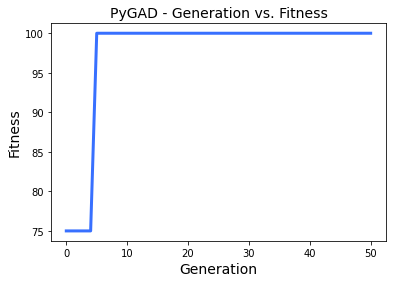

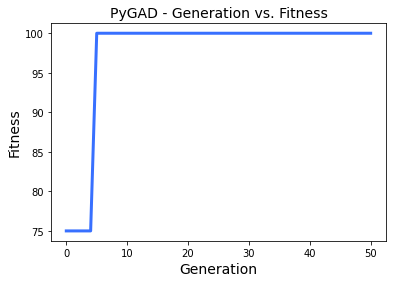

In [ ]:
ga_instance.plot_result()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

[-1.58876785  0.8521806   0.02585169 -2.18798779 -1.61611735  0.13449283
 -2.39009556  0.93820346]
100.0
0


In [ ]:
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs,
                              problem_type="classification")
print("Predictions of the trained network : {predictions}".format(predictions=predictions))

Predictions of the trained network : [0, 1, 1, 0]
